In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import numpy as np
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

#Sampling
from collections import Counter
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Logistic Regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Naive Bayes
from scipy import stats

# Decision Trees
from math import log #to calculate entropy
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

# Regression with CART Trees
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Random Forest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# GridSearch
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Gradient Boosting
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# XGBoost
import xgboost as xgb # xgb.XGBClassifier()

# SVM
from sklearn import svm
from sklearn.svm import SVC
import statsmodels as sm


# Pipelines
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


import warnings
warnings.filterwarnings('ignore')

In [73]:
df = pd.read_csv('data/churn_clean.csv')
print('Dataframe Shape: ',df.shape)
df.head()

Dataframe Shape:  (3333, 38)


,Unnamed: 0,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,night_call_length_per_call,intl_call_length_per_call,day_charge_per_min,eve_charge_per_min,night_charge_per_min,intl_charge_per_min,day_charge_percentage,eve_charge_percentage,night_charge_percentage,intl_charge_percentage
0,0,128,0,1,25,265.1,110,45.07,197.4,99,...,2.689,3.333,0.17,0.085,0.045,0.27,0.593,0.221,0.145,0.036
1,1,107,0,1,26,161.6,123,27.47,195.5,103,...,2.470,4.567,0.17,0.085,0.045,0.27,0.466,0.282,0.194,0.063
2,2,137,0,0,0,243.4,114,41.38,121.2,110,...,1.563,2.440,0.17,0.085,0.045,0.27,0.667,0.166,0.118,0.053
3,3,84,1,0,0,299.4,71,50.90,61.9,88,...,2.212,0.943,0.17,0.085,0.045,0.27,0.760,0.079,0.132,0.027
4,4,75,1,0,0,166.7,113,28.34,148.3,122,...,1.545,3.367,0.17,0.085,0.045,0.27,0.545,0.242,0.162,0.052


In [74]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,night_call_length_per_call,intl_call_length_per_call,day_charge_per_min,eve_charge_per_min,night_charge_per_min,intl_charge_per_min,day_charge_percentage,eve_charge_percentage,night_charge_percentage,intl_charge_percentage
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,2.689,3.333,0.17,0.085,0.045,0.27,0.593,0.221,0.145,0.036
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,2.470,4.567,0.17,0.085,0.045,0.27,0.466,0.282,0.194,0.063
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,1.563,2.440,0.17,0.085,0.045,0.27,0.667,0.166,0.118,0.053
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,2.212,0.943,0.17,0.085,0.045,0.27,0.760,0.079,0.132,0.027
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,1.545,3.367,0.17,0.085,0.045,0.27,0.545,0.242,0.162,0.052


In [75]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_length              3333 non-null   int64  
 1   international_plan          3333 non-null   int64  
 2   voice_mail_plan             3333 non-null   int64  
 3   number_vmail_messages       3333 non-null   int64  
 4   total_day_minutes           3333 non-null   float64
 5   total_day_calls             3333 non-null   int64  
 6   total_day_charge            3333 non-null   float64
 7   total_eve_minutes           3333 non-null   float64
 8   total_eve_calls             3333 non-null   int64  
 9   total_eve_charge            3333 non-null   float64
 10  total_night_minutes         3333 non-null   float64
 11  total_night_calls           3333 non-null   int64  
 12  total_night_charge          3333 non-null   float64
 13  total_intl_minutes          3333 

# Model Functions

## Prediction Function

In [77]:
def model_predictions(model, X_train, X_test, y_train, y_test):
    
    ## Input: Training and test sets of predictors 
    ## Output: The accuracy score of the given sets for each class

    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    
    train_residuals = np.abs(y_train - y_hat_train)
    print('Training Values','\n', pd.Series(train_residuals).value_counts())
    print('------------------------------------')
    print('Training Accuracy','\n', pd.Series(train_residuals).value_counts(normalize=True))
    print('\n\n')
    
    test_residuals = np.abs(y_test - y_hat_test)
    print('Testing Values: ','\n', pd.Series(test_residuals).value_counts())
    print('------------------------------------')
    print('Testing Accuracy: ','\n', pd.Series(test_residuals).value_counts(normalize=True))

In [78]:
# Confusion Matrix

def confusion_matrix(model, X_test, y_test):

    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues_r)
    plt.show()

    y_pred = model.predict(X_test)

    print('------------------------------------')
    # print('Accuracy Score:')
    # print(accuracy_score(y_test, y_pred)
    print("Testing Accuracy for Our Classifier: {:.4}%".format(accuracy_score(y_test, y_pred) * 100))

    
    print('------------------------------------')
    print('Classification Matrix:')
    print(classification_report(y_test, y_pred))

In [79]:
# ROC Curve Function 

def plot_roc(model, X_train, X_test, y_train, y_test):

    ## Input: Model, Train and Test data.
    ## Output: Train and Test AUC, Roc Curve for Train and Test sets.
    ## This function works for classification models with decision_function attribute.
    
    y_train_score = model.decision_function(X_train)
    y_test_score = model.decision_function(X_test)
    
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    
    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
    print('------------------------------------')
    
    plt.figure(figsize=(10, 8))
    lw = 2
    
    plt.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='Train ROC curve')
    plt.plot(test_fpr, test_tpr, color='darkorange',
             lw=lw, label='Test ROC curve')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

In [80]:
def plot_roc_pp(model, X_train, X_test, y_train, y_test):

    ## This function works for classification models with predict_proba attribute.
    
    y_train_score = model.predict_proba(X_train)
    y_test_score = model.predict_proba(X_test)
    
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score [:,1])
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score [:,1])
    
    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
    print('------------------------------------')
    
    plt.figure(figsize=(10, 8))
    lw = 2
    
    plt.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='Train ROC curve')
    plt.plot(test_fpr, test_tpr, color='darkorange',
             lw=lw, label='Test ROC curve')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

In [81]:
def model_control(model, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    print('Train Score:', model.score(X_train, y_train))
    print('Test Score:', model.score(X_test, y_test))
    print('------------------------------------')

    model_predictions(model, X_train, X_test, y_train, y_test)
    confusion_matrix(model, X_test, y_test)
    plot_roc(model, X_train, X_test, y_train, y_test)

In [82]:
def model_control_pp(model, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    print('Train Score:', model.score(X_train, y_train))
    print('Test Score:', model.score(X_test, y_test))
    print('------------------------------------')
    
    model_predictions(model, X_train, X_test, y_train, y_test)
    confusion_matrix(model, X_test, y_test)
    plot_roc_pp(model, X_train, X_test, y_train, y_test)

In [83]:
def plot_feature_importances(model, X):
    ft_importances = sorted(list(zip(model.feature_importances_, X.columns)))
    sns.set_style('darkgrid')
    plt.figure(figsize=(8, 11))
    plt.barh([f[1] for f in ft_importances], [f[0] for f in ft_importances], align='center') 
    plt.xlabel('Importance', fontsize=16)
    plt.ylabel('Feature', fontsize=16)
    plt.title('Feature Importance', fontsize=20)

# Models

In [84]:
y = df['churn']
X = df.drop(['churn'], axis=1)

## Logistic Regression

### Base

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

In [86]:
scaler = StandardScaler()
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10)
model = LogisticRegression(fit_intercept=False, C=10e16, solver='liblinear', class_weight='balanced', max_iter=10000, random_state=123)                        

pipeline_lr = Pipeline(steps=[('s', rfe), ('ss', scaler), ('m', model)])

# Fit the model

pipeline_lr.fit(X_train, y_train)

print('Train Score:', pipeline_lr.score(X_train, y_train))
print('Test Score:', pipeline_lr.score(X_test, y_test))

Train Score: 0.7214885954381752
Test Score: 0.7589928057553957


In [87]:
model_predictions(pipeline_lr, X_train, X_test, y_train, y_test)

Training Values 
 0    1803
1     696
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.721489
1    0.278511
Name: churn, dtype: float64



Testing Values:  
 0    633
1    201
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.758993
1    0.241007
Name: churn, dtype: float64


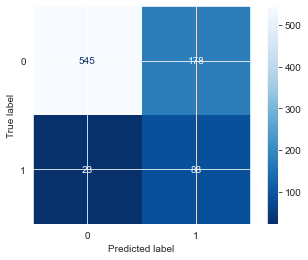

------------------------------------
Testing Accuracy for Our Classifier: 75.9%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       723
           1       0.33      0.79      0.47       111

    accuracy                           0.76       834
   macro avg       0.65      0.77      0.66       834
weighted avg       0.88      0.76      0.79       834



In [88]:
confusion_matrix(pipeline_lr, X_test, y_test)

Train AUC: 0.7823440051362159
Test AUC: 0.8365543967203718
------------------------------------


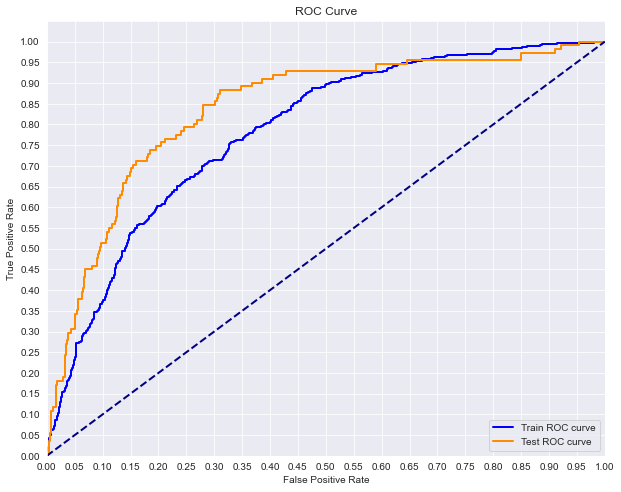

In [89]:
plot_roc(pipeline_lr, X_train, X_test, y_train, y_test)

### Oversampling

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)
oversample = RandomOverSampler(sampling_strategy='minority', random_state=123)

X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

print(Counter(y_train_over))
print('------------------------------------')

pipeline_lr.fit(X_train_over, y_train_over)
print('Train Score:', pipeline_lr.score(X_train_over, y_train_over))
print('Test Score:', pipeline_lr.score(X_test, y_test))

Counter({0: 2127, 1: 2127})
------------------------------------
Train Score: 0.7564645039962389
Test Score: 0.7709832134292566


Train Score: 0.7564645039962389
Test Score: 0.7709832134292566
------------------------------------
Training Values 
 0    3218
1    1036
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.756465
1    0.243535
Name: churn, dtype: float64



Testing Values:  
 0    643
1    191
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.770983
1    0.229017
Name: churn, dtype: float64


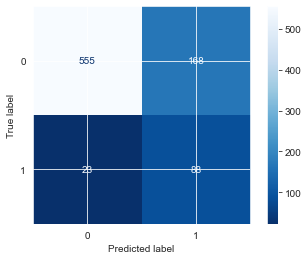

------------------------------------
Testing Accuracy for Our Classifier: 77.1%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.96      0.77      0.85       723
           1       0.34      0.79      0.48       111

    accuracy                           0.77       834
   macro avg       0.65      0.78      0.67       834
weighted avg       0.88      0.77      0.80       834

Train AUC: 0.8232897426222815
Test AUC: 0.8513949634281585
------------------------------------


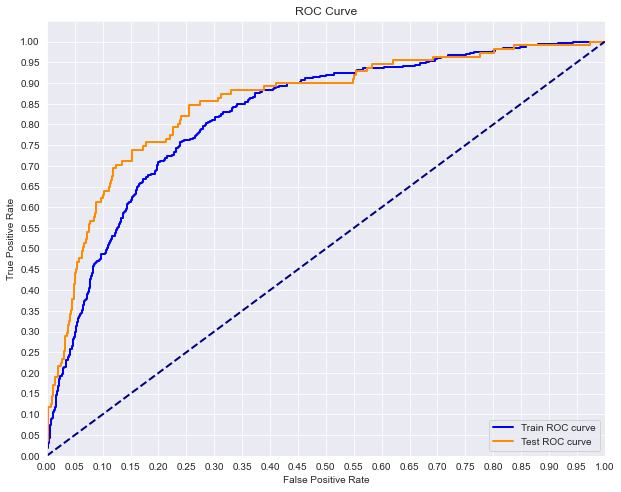

In [91]:
model_control(pipeline_lr, X_train_over, X_test, y_train_over, y_test)

### SMOTE

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(sampling_strategy=0.7)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 

print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Original class distribution: 

0    2850
1     483
Name: churn, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

0    2127
1    1488
Name: churn, dtype: int64


In [93]:
lr_smote = LogisticRegression(fit_intercept=False, C=10e16, solver='liblinear', max_iter=10000, random_state=123) 

lr_smote.fit(X_train_resampled, y_train_resampled)

print('Train Score:', pipeline_lr.score(X_train_resampled, y_train_resampled))
print('Test Score:', pipeline_lr.score(X_test, y_test))

Train Score: 0.5883817427385892
Test Score: 0.8657074340527577


# K Nearest Neighbors

## Model

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X_train_scaled, y_train)

print('Train Score:', knn_clf.score(X_train_scaled, y_train))
print('Test Score:', knn_clf.score(X_test_scaled, y_test))

Train Score: 0.9195678271308524
Test Score: 0.8872901678657075


## Predictions

In [95]:
model_predictions(knn_clf, X_train_scaled, X_test_scaled, y_train, y_test)

Training Values 
 0    2298
1     201
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.919568
1    0.080432
Name: churn, dtype: float64



Testing Values:  
 0    740
1     94
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.88729
1    0.11271
Name: churn, dtype: float64


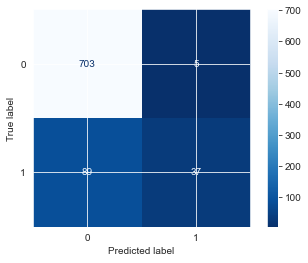

------------------------------------
Testing Accuracy for Our Classifier: 88.73%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       708
           1       0.88      0.29      0.44       126

    accuracy                           0.89       834
   macro avg       0.88      0.64      0.69       834
weighted avg       0.89      0.89      0.86       834



In [96]:
confusion_matrix(knn_clf, X_test_scaled, y_test)

Train AUC: 0.961928562274583
Test AUC: 0.8586785938480854
------------------------------------


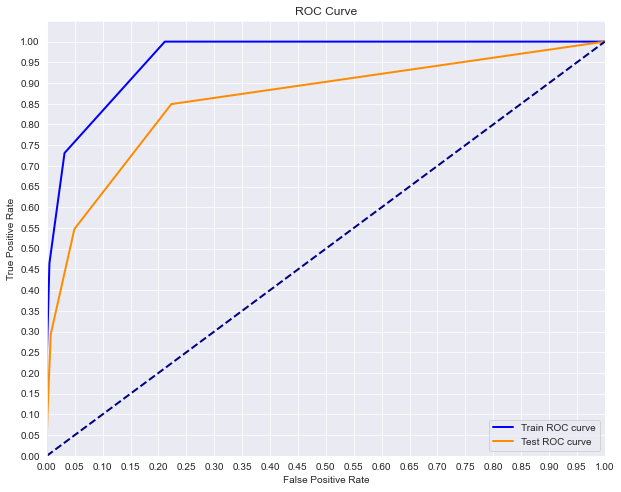

In [97]:
plot_roc_pp(knn_clf, X_train_scaled, X_test_scaled, y_train, y_test)

## Tuning

### VIF Score

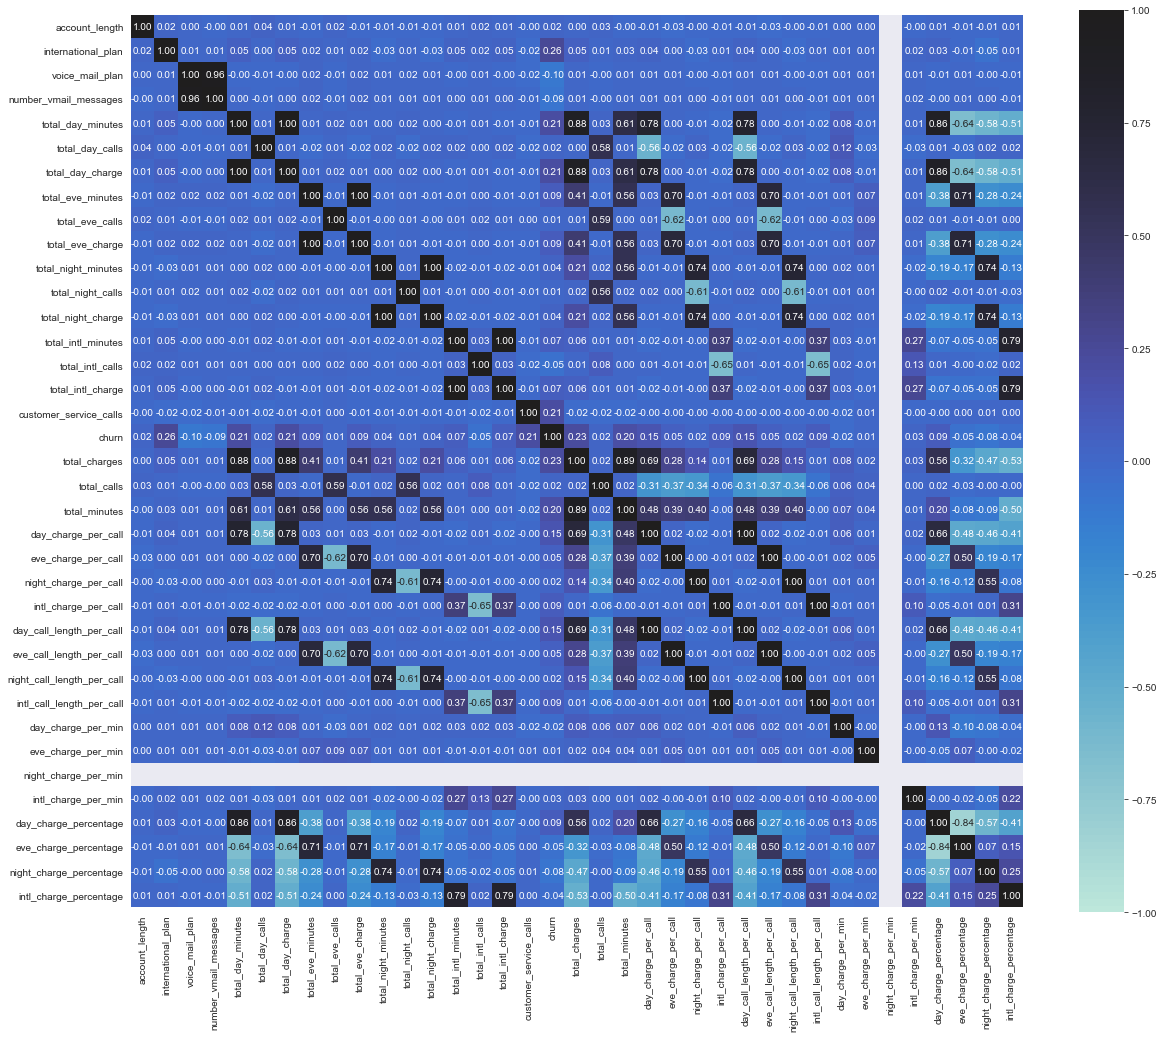

In [98]:
plt.figure(figsize=(20,20))

sns.heatmap(df.corr(), vmax=1.0, vmin=-1.0, square=True, fmt='.2f',annot=True, cbar_kws={'shrink': .83}, 
            center = 1.0, yticklabels=df.columns.values, xticklabels=df.columns.values)
plt.show();

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

In [100]:
vif = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif_scores = list(zip(X_train.columns, vif))
vif_scores.sort(key=lambda x: x[1], reverse=True,)
print('VIF SCORES')   
print((vif_scores))
print('------------------------------')
columns_to_use = list()
for vif_score in vif_scores:
    if vif_score[1] < 10:
        columns_to_use.append(vif_score[0])
print('Columns to Use For Logistic Regression','\n', columns_to_use)

VIF SCORES
[('total_day_calls', inf), ('total_eve_calls', inf), ('total_night_calls', inf), ('total_intl_calls', inf), ('total_calls', inf), ('total_day_minutes', 10745721.526401466), ('total_day_charge', 10727689.156235274), ('total_eve_minutes', 2283300.632788586), ('total_eve_charge', 2260018.394306336), ('intl_call_length_per_call', 978345.8072371794), ('intl_charge_per_call', 978226.2304437497), ('total_night_minutes', 679279.4441508664), ('total_night_charge', 648376.4582670392), ('total_intl_minutes', 199829.98427370976), ('total_intl_charge', 199538.36394135744), ('day_call_length_per_call', 179546.42949482487), ('day_charge_per_call', 179544.23512603485), ('total_minutes', 97707.32636208266), ('eve_call_length_per_call', 47371.61746712286), ('eve_charge_per_call', 47357.81952889847), ('total_charges', 27255.896138726715), ('night_charge_per_call', 12071.421220511605), ('night_call_length_per_call', 12069.927077351056), ('day_charge_percentage', 6895.3708162446965), ('eve_charg

In [101]:
X_train = X_train[columns_to_use]
X_test = X_test[columns_to_use]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_clf_vif = KNeighborsClassifier(n_neighbors=5)

knn_clf_vif.fit(X_train_scaled, y_train)

print('Train Score:', knn_clf_vif.score(X_train_scaled, y_train))
print('Test Score:', knn_clf_vif.score(X_test_scaled, y_test))

Train Score: 0.8887555022008804
Test Score: 0.8525179856115108


Train Score: 0.8887555022008804
Test Score: 0.8525179856115108
------------------------------------
Training Values 
 0    2221
1     278
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.888756
1    0.111244
Name: churn, dtype: float64



Testing Values:  
 0    711
1    123
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.852518
1    0.147482
Name: churn, dtype: float64


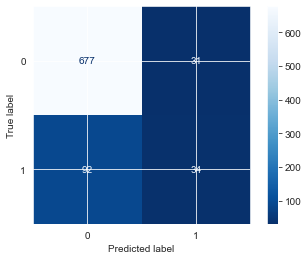

------------------------------------
Testing Accuracy for Our Classifier: 85.25%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       708
           1       0.52      0.27      0.36       126

    accuracy                           0.85       834
   macro avg       0.70      0.61      0.64       834
weighted avg       0.83      0.85      0.83       834

Train AUC: 0.8833709954570063
Test AUC: 0.7009517083669625
------------------------------------


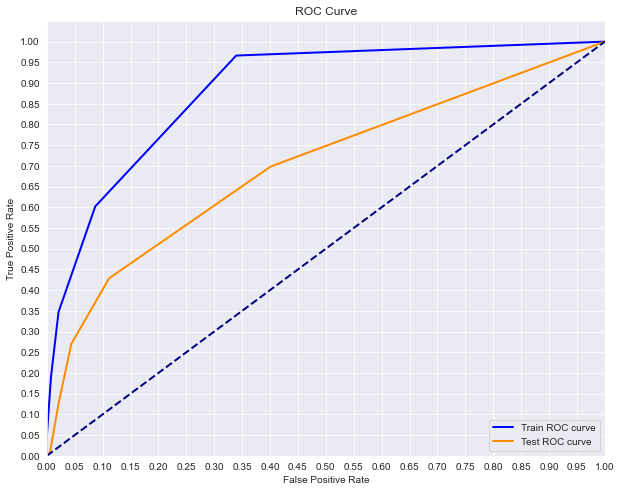

In [102]:
model_control_pp(knn_clf_vif, X_train_scaled, X_test_scaled, y_train, y_test)


### Best K Value

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:

def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_score = knn.score(X_train, y_train)
        test_score = knn.score(X_test, y_test)
        if test_score > best_score:
            best_k = k
            best_score = test_score
    
    print("Best Value for k: {}".format(best_k))
    
find_best_k(X_train_scaled, y_train, X_test_scaled, y_test)

Best Value for k: 3


In [105]:
knn_3_clf = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn_3_clf.fit(X_train_scaled, y_train)

print('Train Score:', knn_3_clf.score(X_train_scaled, y_train))
print('Test Score:', knn_3_clf.score(X_test_scaled, y_test))

Train Score: 0.9267707082833133
Test Score: 0.8872901678657075


Train Score: 0.9267707082833133
Test Score: 0.8872901678657075
------------------------------------
Training Values 
 0    2316
1     183
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.926771
1    0.073229
Name: churn, dtype: float64



Testing Values:  
 0    740
1     94
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.88729
1    0.11271
Name: churn, dtype: float64


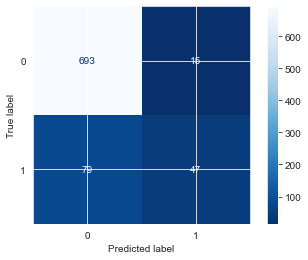

------------------------------------
Testing Accuracy for Our Classifier: 88.73%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       708
           1       0.76      0.37      0.50       126

    accuracy                           0.89       834
   macro avg       0.83      0.68      0.72       834
weighted avg       0.88      0.89      0.87       834

Train AUC: 0.9735737432227793
Test AUC: 0.7905625056048785
------------------------------------


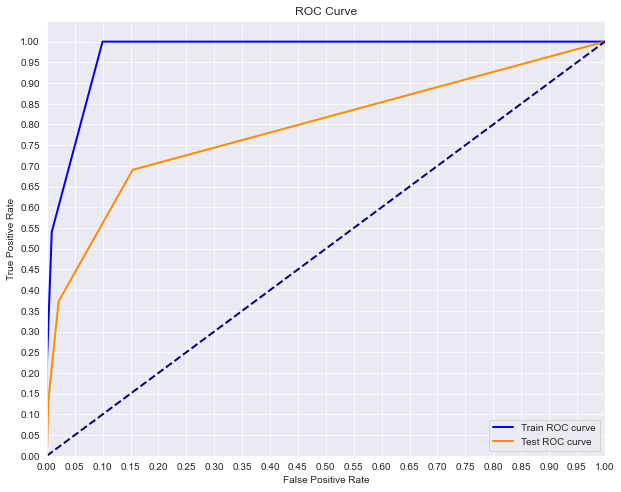

In [106]:
model_control_pp(knn_3_clf, X_train_scaled, X_test_scaled, y_train, y_test)


### Grid Search

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_clf_gs = KNeighborsClassifier()

knn_grid = {'n_neighbors': [3, 5, 7, 9], 'weights':['uniform', 'distance'], 'metric': ['euclidean', 'manhattan'], 'n_jobs': [-1]}

knn_gridsearch = GridSearchCV(estimator=knn_clf_gs, param_grid=knn_grid, cv=5, return_train_score=True)

knn_gridsearch.fit(X_train_scaled, y_train)

print('Best parameters for Our KNN Model:')
knn_gridsearch.best_params_

Best parameters for Our KNN Model:


{'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}

In [108]:
nn_clf_gs = KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=5, weights='uniform')

knn_clf_gs.fit(X_train_scaled, y_train)

print('Train Score:', knn_clf_gs.score(X_train_scaled, y_train))
print('Test Score:', knn_clf_gs.score(X_test_scaled, y_test))

Train Score: 0.9195678271308524
Test Score: 0.8872901678657075


Train Score: 0.9195678271308524
Test Score: 0.8872901678657075
------------------------------------
Training Values 
 0    2298
1     201
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.919568
1    0.080432
Name: churn, dtype: float64



Testing Values:  
 0    740
1     94
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.88729
1    0.11271
Name: churn, dtype: float64


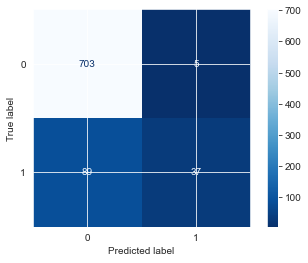

------------------------------------
Testing Accuracy for Our Classifier: 88.73%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       708
           1       0.88      0.29      0.44       126

    accuracy                           0.89       834
   macro avg       0.88      0.64      0.69       834
weighted avg       0.89      0.89      0.86       834

Train AUC: 0.961928562274583
Test AUC: 0.8586785938480854
------------------------------------


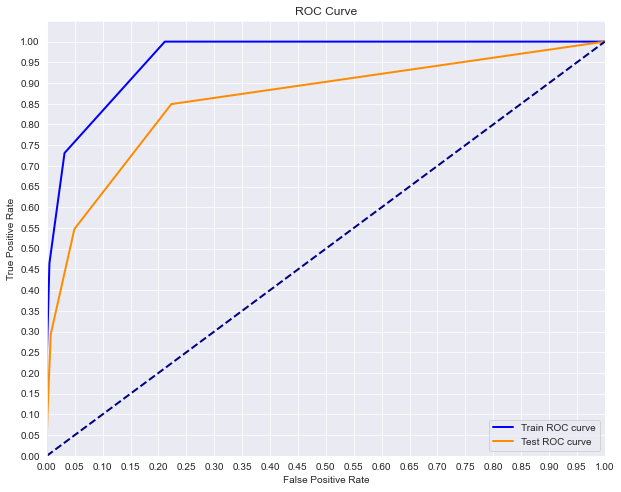

In [109]:
model_control_pp(knn_clf_gs, X_train_scaled, X_test_scaled, y_train, y_test)

# Decision Tree

## Model

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

scaler = StandardScaler()
model = DecisionTreeClassifier(random_state=123)                       

pipeline_dt = Pipeline([('ss', scaler), ('m', model),])

pipeline_dt.fit(X_train, y_train)

print('Train Score:', pipeline_dt.score(X_train, y_train))
print('Test Score:', pipeline_dt.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.9532374100719424


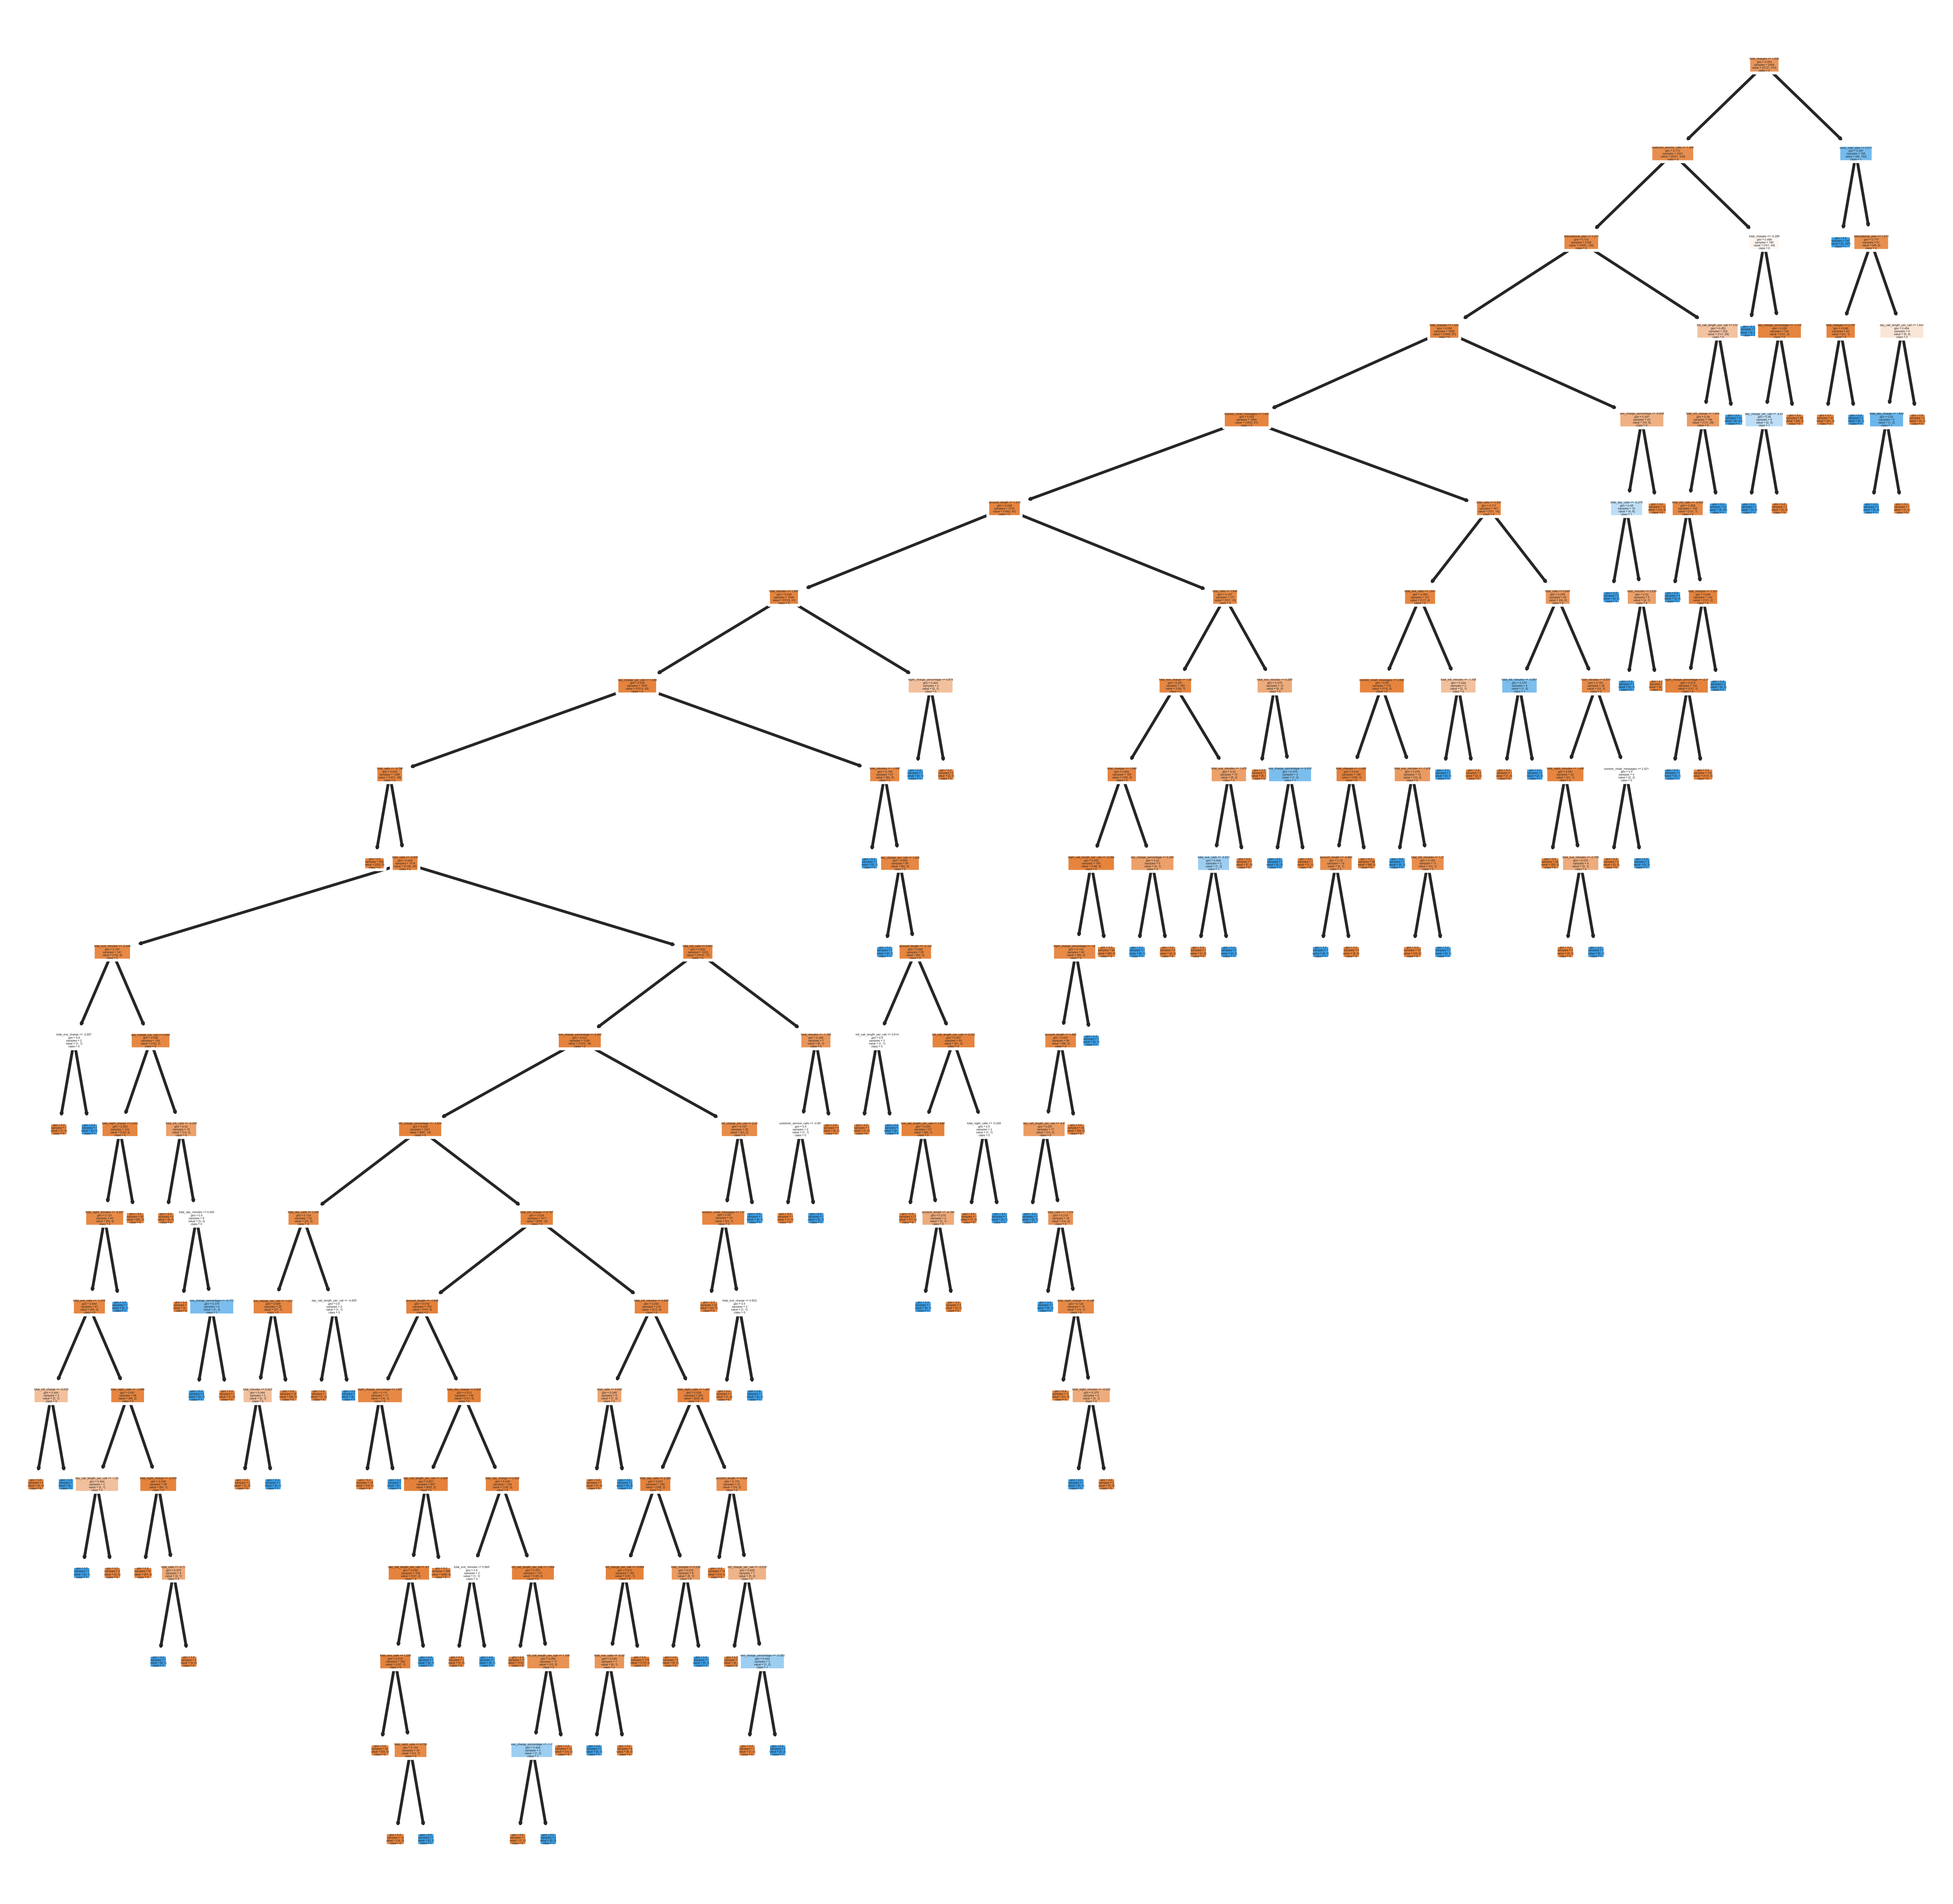

In [111]:
plt.figure(figsize=(12,12), dpi=500, edgecolor='black')

tree.plot_tree(model, feature_names=X.columns, class_names=np.unique(y).astype('str'), filled=True, rounded=True)
plt.show()

In [112]:
model_predictions(pipeline_dt, X_train, X_test, y_train, y_test)

Training Values 
 0    2499
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    1.0
Name: churn, dtype: float64



Testing Values:  
 0    795
1     39
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.953237
1    0.046763
Name: churn, dtype: float64


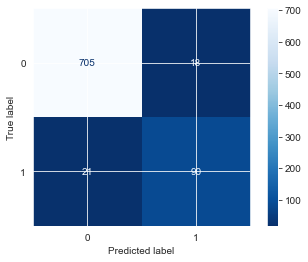

------------------------------------
Testing Accuracy for Our Classifier: 95.32%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       723
           1       0.83      0.81      0.82       111

    accuracy                           0.95       834
   macro avg       0.90      0.89      0.90       834
weighted avg       0.95      0.95      0.95       834



In [113]:
confusion_matrix(pipeline_dt, X_test, y_test)

Train AUC: 1.0
Test AUC: 0.8929572726253224
------------------------------------


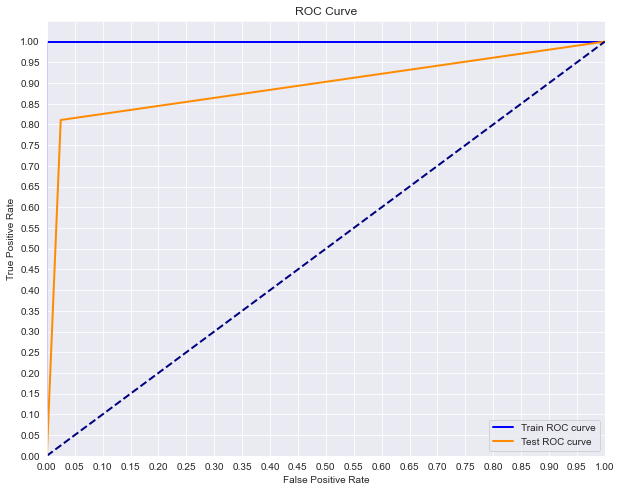

In [114]:
plot_roc_pp(pipeline_dt, X_train, X_test, y_train, y_test)


## Model Tuning

### Imbalance

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

oversample = RandomOverSampler(sampling_strategy='minority', random_state=123)

X_train_over, y_train_over = oversample.fit_resample(X_train_scaled, y_train)

print(Counter(y_train_over))

dt_clf_os = DecisionTreeClassifier(random_state=123)                       

dt_clf_os.fit(X_train_over, y_train_over)

Counter({0: 2127, 1: 2127})


DecisionTreeClassifier(random_state=123)

Train Score: 1.0
Test Score: 0.9424460431654677
------------------------------------
Training Values 
 0    4254
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    1.0
Name: churn, dtype: float64



Testing Values:  
 0    786
1     48
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.942446
1    0.057554
Name: churn, dtype: float64


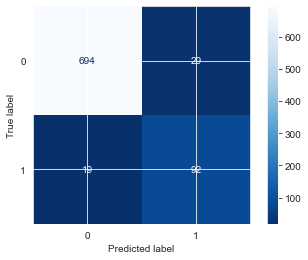

------------------------------------
Testing Accuracy for Our Classifier: 94.24%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       723
           1       0.76      0.83      0.79       111

    accuracy                           0.94       834
   macro avg       0.87      0.89      0.88       834
weighted avg       0.95      0.94      0.94       834

Train AUC: 1.0
Test AUC: 0.8943590893798363
------------------------------------


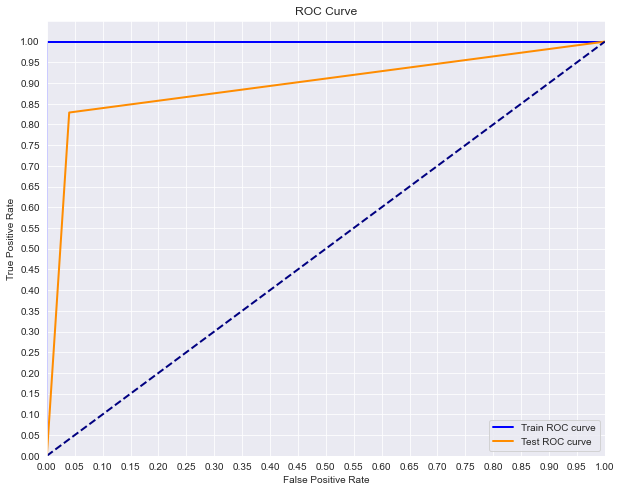

In [116]:
model_control_pp(dt_clf_os, X_train_over, X_test_scaled, y_train_over, y_test)

### Grid Search

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_clf_gs = DecisionTreeClassifier(random_state=123)

dt_grid = {'class_weight': ['None', 'balanced'], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6],
           'min_samples_leaf': [1, 2, 3, 4, 5, 6], 'min_samples_split': [2, 5, 10], 'random_state': [123]}

dt_gridsrch = GridSearchCV(estimator = dt_clf_gs, param_grid = dt_grid, cv=5, return_train_score=True)

dt_gridsrch.fit(X_train_scaled, y_train)

print('Best parameters for Our Decision Tree Model:')
dt_gridsrch.best_params_

Best parameters for Our Decision Tree Model:


{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 123}

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_clf = DecisionTreeClassifier(class_weight = 'balanced', criterion = 'entropy', max_depth = 5,
                                min_samples_leaf = 2, min_samples_split = 2, random_state = 123)
dt_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_leaf=2, random_state=123)

Train Score: 0.974389755902361
Test Score: 0.9664268585131894
------------------------------------
Training Values 
 0    2435
1      64
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.97439
1    0.02561
Name: churn, dtype: float64



Testing Values:  
 0    806
1     28
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.966427
1    0.033573
Name: churn, dtype: float64


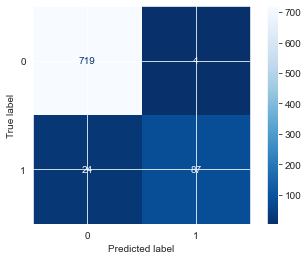

------------------------------------
Testing Accuracy for Our Classifier: 96.64%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       723
           1       0.96      0.78      0.86       111

    accuracy                           0.97       834
   macro avg       0.96      0.89      0.92       834
weighted avg       0.97      0.97      0.96       834

Train AUC: 0.9367211631304628
Test AUC: 0.8766089741193475
------------------------------------


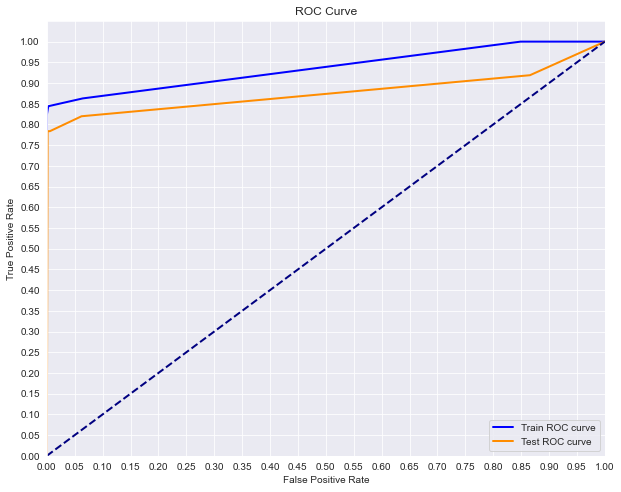

In [119]:
model_control_pp(dt_clf, X_train_scaled, X_test_scaled, y_train, y_test)

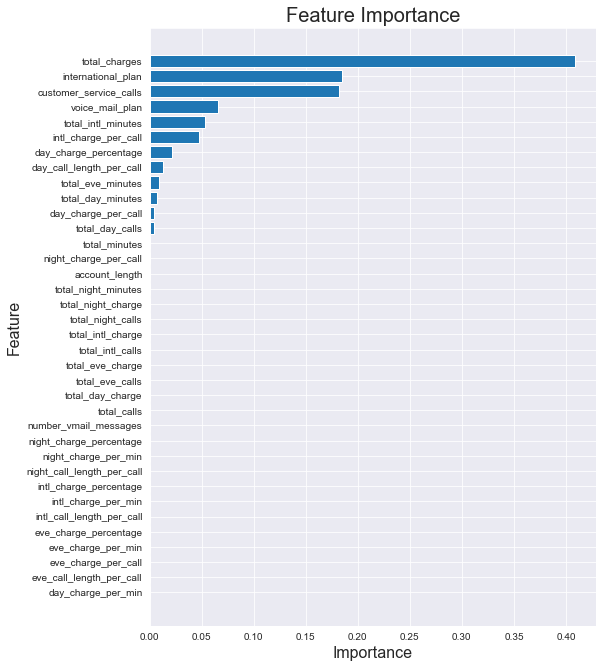

In [120]:
plot_feature_importances(dt_clf, X)

# Random Forest

## Model

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_clf = RandomForestClassifier(criterion='gini', max_depth= 5, n_estimators=20, random_state=123)

# Fit the model

rf_clf.fit(X_train_scaled, y_train)

print('Train Score:', rf_clf.score(X_train_scaled, y_train))
print('Test Score:', rf_clf.score(X_test_scaled, y_test))

Train Score: 0.9195678271308524
Test Score: 0.9148681055155875


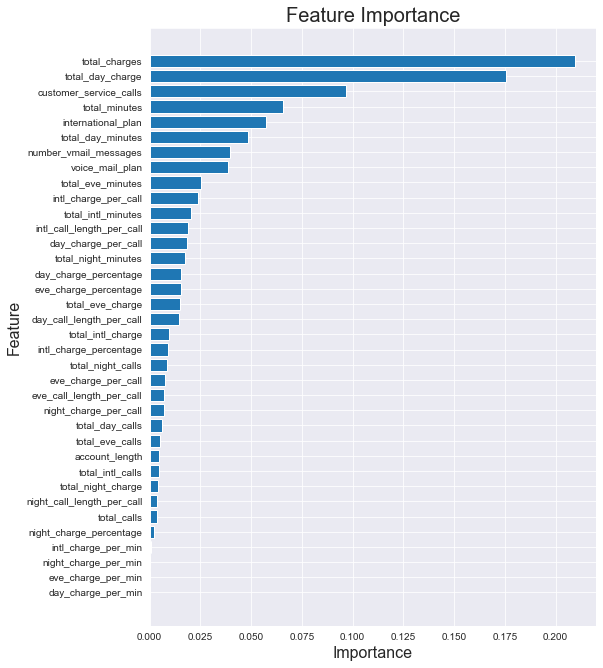

In [122]:
plot_feature_importances(rf_clf, X)

In [123]:
model_predictions(rf_clf, X_train_scaled, X_test_scaled, y_train, y_test)

Training Values 
 0    2298
1     201
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.919568
1    0.080432
Name: churn, dtype: float64



Testing Values:  
 0    763
1     71
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.914868
1    0.085132
Name: churn, dtype: float64


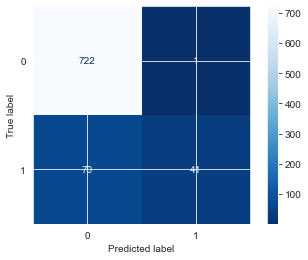

------------------------------------
Testing Accuracy for Our Classifier: 91.49%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       723
           1       0.98      0.37      0.54       111

    accuracy                           0.91       834
   macro avg       0.94      0.68      0.74       834
weighted avg       0.92      0.91      0.90       834



In [124]:
confusion_matrix(rf_clf, X_test_scaled, y_test)

Train AUC: 0.9494801856317394
Test AUC: 0.9216727100544528
------------------------------------


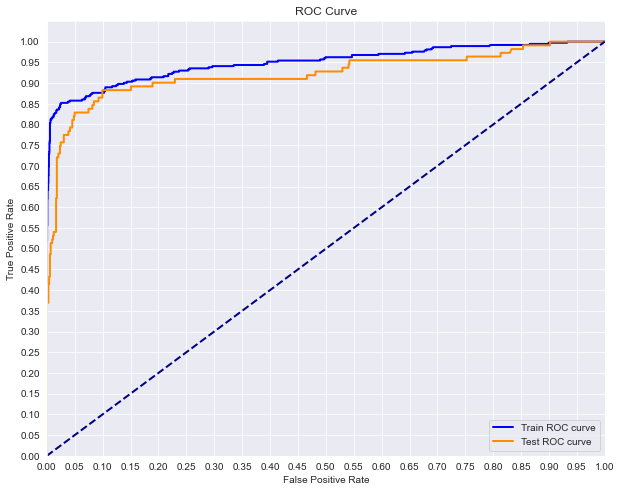

In [125]:
plot_roc_pp(rf_clf, X_train_scaled, X_test_scaled, y_train, y_test)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

oversample = RandomOverSampler(sampling_strategy='minority', random_state=123)

X_train_over, y_train_over = oversample.fit_resample(X_train_scaled, y_train)

print(Counter(y_train_over))


rf_clf_os = RandomForestClassifier(criterion='gini', max_depth= 5, n_estimators=20, random_state=123)

Counter({0: 2127, 1: 2127})


Train Score: 0.924306535025858
Test Score: 0.9544364508393285
------------------------------------
Training Values 
 0    3932
1     322
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.924307
1    0.075693
Name: churn, dtype: float64



Testing Values:  
 0    796
1     38
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.954436
1    0.045564
Name: churn, dtype: float64


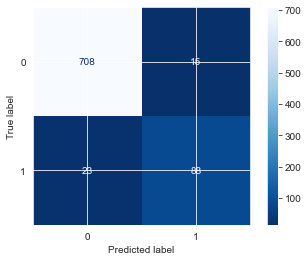

------------------------------------
Testing Accuracy for Our Classifier: 95.44%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       723
           1       0.85      0.79      0.82       111

    accuracy                           0.95       834
   macro avg       0.91      0.89      0.90       834
weighted avg       0.95      0.95      0.95       834

Train AUC: 0.9583933172551005
Test AUC: 0.9289310056944912
------------------------------------


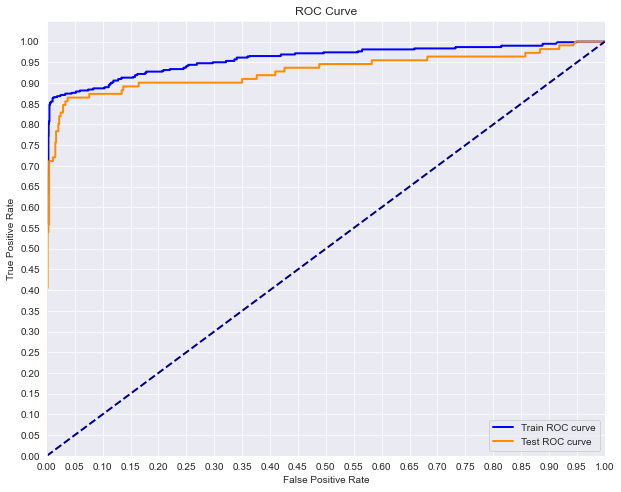

In [127]:
model_control_pp(rf_clf_os, X_train_over, X_test_scaled, y_train_over, y_test)

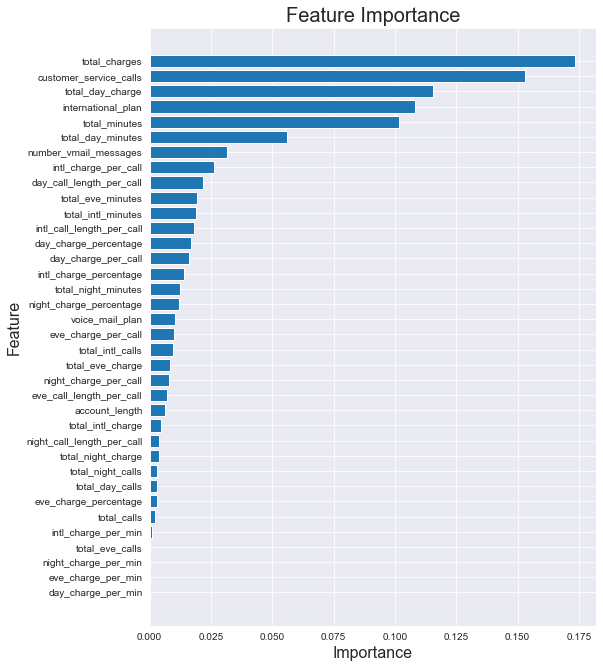

In [128]:
plot_feature_importances(rf_clf_os, X)

## Bagged Trees

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=123), n_estimators=20, random_state=123)

In [130]:
bagged_tree.fit(X_train_scaled, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        random_state=123),
                  n_estimators=20, random_state=123)

Train Score: 0.974389755902361
Test Score: 0.9700239808153477
------------------------------------
Training Values 
 0    2435
1      64
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.97439
1    0.02561
Name: churn, dtype: float64



Testing Values:  
 0    809
1     25
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.970024
1    0.029976
Name: churn, dtype: float64


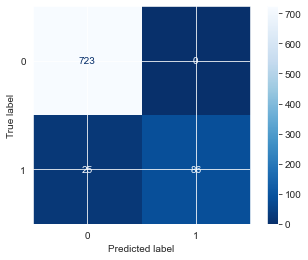

------------------------------------
Testing Accuracy for Our Classifier: 97.0%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       723
           1       1.00      0.77      0.87       111

    accuracy                           0.97       834
   macro avg       0.98      0.89      0.93       834
weighted avg       0.97      0.97      0.97       834

Train AUC: 0.9529039082760817
Test AUC: 0.892190946132855
------------------------------------


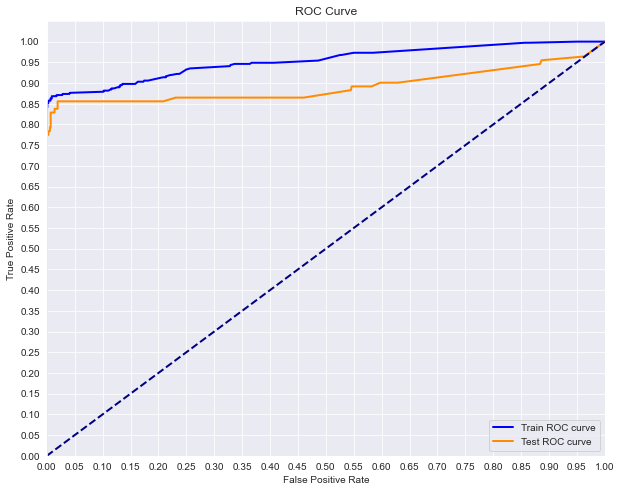

In [131]:
model_control_pp(bagged_tree, X_train_scaled, X_test_scaled, y_train, y_test)

# XG Boost

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_clf = xgb.XGBClassifier(max_depth=5, learning_rate=0.1, random_state=123, eval_metric='logloss')

xgb_clf.fit(X_train_scaled, y_train)

print('Train Score:', xgb_clf.score(X_train_scaled, y_train))
print('Test Score:', xgb_clf.score(X_test_scaled, y_test))

Train Score: 0.9859943977591037
Test Score: 0.9772182254196643


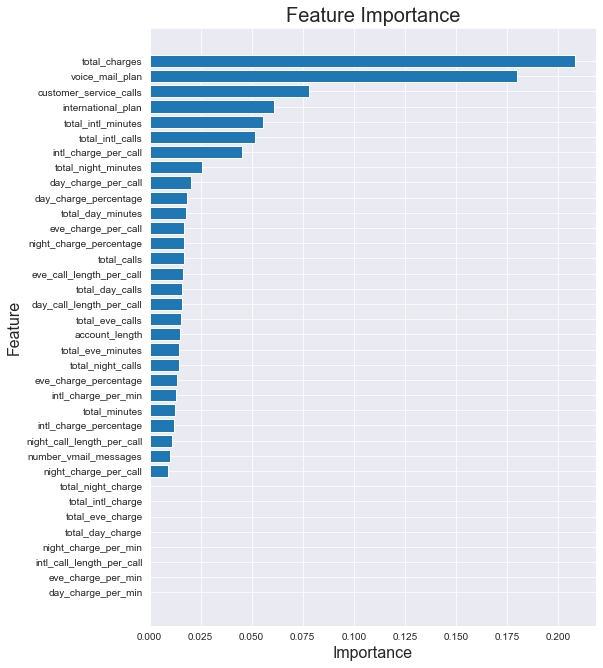

In [134]:
plot_feature_importances(xgb_clf, X)

In [135]:
model_predictions(xgb_clf, X_train_scaled, X_test_scaled, y_train, y_test)

Training Values 
 0    2464
1      35
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.985994
1    0.014006
Name: churn, dtype: float64



Testing Values:  
 0    815
1     19
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.977218
1    0.022782
Name: churn, dtype: float64


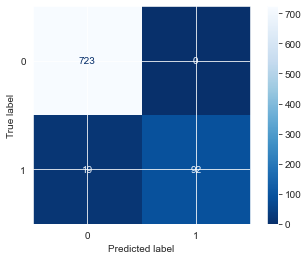

------------------------------------
Testing Accuracy for Our Classifier: 97.72%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       723
           1       1.00      0.83      0.91       111

    accuracy                           0.98       834
   macro avg       0.99      0.91      0.95       834
weighted avg       0.98      0.98      0.98       834



In [136]:
confusion_matrix(xgb_clf, X_test_scaled, y_test)

Train AUC: 0.9999595573552533
Test AUC: 0.9312922881387612
------------------------------------


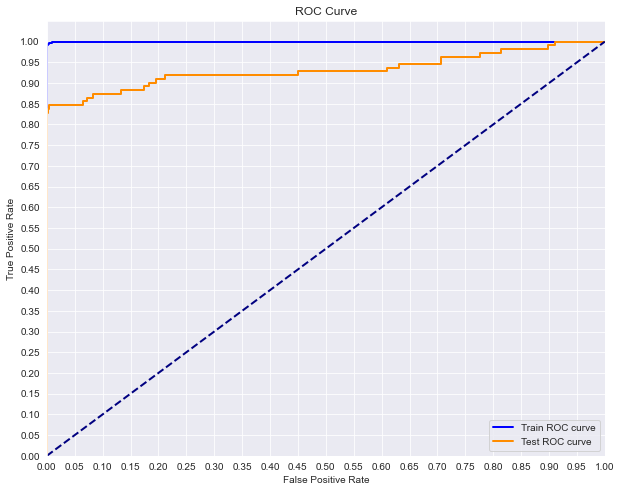

In [137]:
plot_roc_pp(xgb_clf, X_train_scaled, X_test_scaled, y_train, y_test)

### Model Tuning

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_clf_gs = xgb.XGBClassifier(random_state=123, eval_metric='logloss')

xgb_grid = {'learning_rate': [0.01, 0.1, 0.5], 'gamma': [0, 0.01, 0.1], 'max_depth': [2, 5, 6, 10], 
            'min_child_weight': [0.1, 1, 10], 'subsample': [0.5, 0.7, 0.9], 'n_estimators': [5, 10, 20, 100]}

xgb_gridsearch = GridSearchCV(estimator=xgb_clf_gs, param_grid=xgb_grid, cv=5, return_train_score=True)

xgb_gridsearch.fit(X_train_scaled, y_train)

print('Best Parameters for XGBoost Model:')
xgb_gridsearch.best_params_

Best Parameters for XGBoost Model:


{'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 10,
 'min_child_weight': 0.1,
 'n_estimators': 100,
 'subsample': 0.5}

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_clf_gs = xgb.XGBClassifier(gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=0.1, n_estimators=100, subsample=0.5, random_state=123, eval_metric='logloss')

xgb_clf_gs.fit(X_train_scaled, y_train)

print('Train Score:', xgb_clf_gs.score(X_train_scaled, y_train))
print('Test Score:', xgb_clf_gs.score(X_test_scaled, y_test))

Train Score: 0.9751900760304122
Test Score: 0.9748201438848921


Train Score: 0.9751900760304122
Test Score: 0.9748201438848921
------------------------------------
Training Values 
 0    2437
1      62
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.97519
1    0.02481
Name: churn, dtype: float64



Testing Values:  
 0    813
1     21
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.97482
1    0.02518
Name: churn, dtype: float64


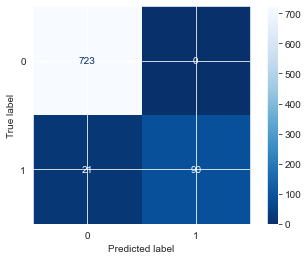

------------------------------------
Testing Accuracy for Our Classifier: 97.48%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       723
           1       1.00      0.81      0.90       111

    accuracy                           0.97       834
   macro avg       0.99      0.91      0.94       834
weighted avg       0.98      0.97      0.97       834

Train AUC: 0.9790488142722095
Test AUC: 0.927055686391786
------------------------------------


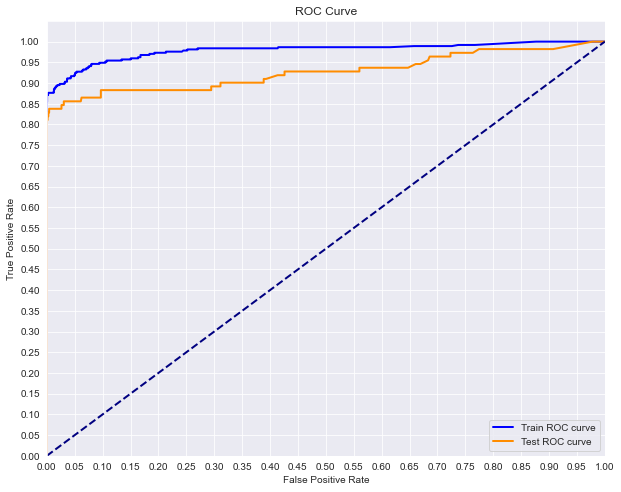

In [140]:
model_control_pp(xgb_clf_gs, X_train_scaled, X_test_scaled, y_train, y_test)


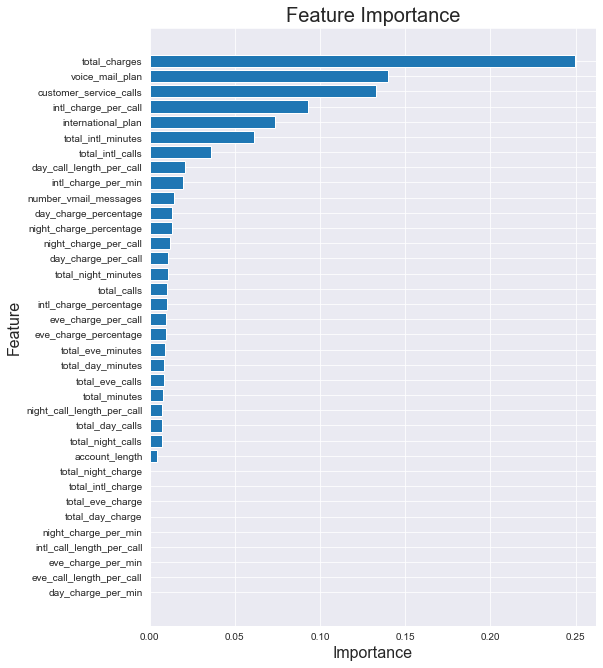

In [141]:
plot_feature_importances(xgb_clf_gs, X)